# 작업 1유형 

Q1. 주어진 Dataset에서 CRIM값이 가장 큰 10개의 지역을 구하고
10개의 지역의 CRIM값을 그 중 가장 작은 값으로 대체하라. 그리고
AGE 컬럼 값이 80이상인 대체 된 CRIM 평균값을 구하라

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e2_p1_1.csv')
df.head()

In [ ]:
temp = df.sort_values('CRIM',ascending=False)
temp.iloc[:10,0] = temp.iloc[9,0]
result = temp[(temp['AGE']>=80)]
result['CRIM'].mean()

Q2. 1-1에서 사용한 데이터에서 RM 중앙값으로 해당 컬럼의 결측치를 대체하라
그리고 해당 컬럼의 결측치 대치 전후의 표준편차 차이의 절댓값을 소숫점 이하 3째자리 까지 구하라

In [ ]:
temp = df.copy()

pre_std = df['RM'].std()

rm_median = temp['RM'].median()
temp['RM'] = temp['RM'].fillna(rm_median)
after_std = temp['RM'].std()

result = abs(pre_std-after_std)
print(round(result,3))

Q3. 주어진 Dataset의 DIS 평균으로 부터 1.5 * 표준편차를 벗어나는 영역을 이상치라고 판단하고
DIS 컬럼의 이상치들의 합을 구하여라.

In [ ]:
mean = df['DIS'].mean()
std = df['DIS'].std()
result = df[(df['DIS'] < mean - std*1.5) | (df['DIS'] > mean + std*1.5)]
result =result['DIS'].sum()
print(result)

# 작업 2유형 

e-commerce 배송의 정시 도착여부를 예측하시오(1: 정시배송 0 : 정시미배송)
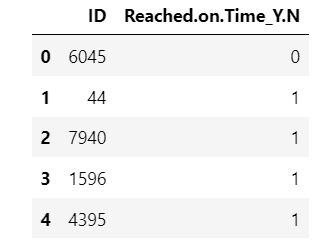

In [ ]:
import pandas as pd
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_test.csv")

In [ ]:
x_train = x_train.drop(columns='ID')
x_test_id = x_test.pop('ID')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

x_train['Warehouse_block'] = encoder.fit_transform(x_train['Warehouse_block'])
x_test['Warehouse_block'] = encoder.fit_transform(x_test['Warehouse_block'])

x_train['Mode_of_Shipment'] = encoder.fit_transform(x_train['Mode_of_Shipment'])
x_test['Mode_of_Shipment'] = encoder.fit_transform(x_test['Mode_of_Shipment'])

x_train['Customer_care_calls'] = encoder.fit_transform(x_train['Customer_care_calls'])
x_test['Customer_care_calls'] = encoder.fit_transform(x_test['Customer_care_calls'])

x_train['Product_importance'] = encoder.fit_transform(x_train['Product_importance'])
x_test['Product_importance'] = encoder.fit_transform(x_test['Product_importance'])

x_train['Gender'] = encoder.fit_transform(x_train['Gender'])
x_test['Gender'] = encoder.fit_transform(x_test['Gender'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train['Reached.on.Time_Y.N'],test_size = 0.2)

In [ ]:
rf = RandomForestClassifier(max_depth =5, random_state=100)
rf.fit(X_train,Y_train)
pred_rf = rf.predict_proba(X_test)

In [ ]:
predict = rf.predict_proba(x_test)
predict

In [ ]:
submission = pd.DataFrame({'ID':x_test_id,
                          'Reached.on.Time_Y.N':predict[:,1]})
submission

# 작업 3유형 

Q1.122마리의 height 평균값을 m(미터) 단위로 소숫점 이하 5자리까지 실수 값만 출력하라

In [7]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e2_p3_1.csv')
df.head(5)

temp = df.copy()
temp['meter'] = temp['height'].str.replace('cm','').astype('float')
result = temp['meter'].mean()*0.01
print(round(result,5))

0.29951


Q2. 모집단의 평균 길이가 30cm 인지 확인하려 일표본 t 검정을 시행하여 확인하려한다. 검정통계량을 소숫점 이하 3째자리까지 구하여라

In [18]:
from scipy import stats
from scipy.stats import ttest_1samp

s, p = ttest_1samp(temp['meter'],30)
print(round(s,3))

-0.217


Q3. 위의 통계량에 대한 p-값을 구하고 (반올림하여 소숫점 이하 3째자리), 유의수준 0.05하에서 귀무가설과 대립가설중 유의한 가설을 하나를 선택하시오(귀무/대립)

In [19]:
print(round(p,3))
#귀무가설

0.829
